<a href="https://colab.research.google.com/github/treklm/CV/blob/master/Python_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отримання даних

In [72]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
response=requests.get("https://uadata.net/work-positions/cities.json?o=Київ")
data_json=response.json()

Створення :DataFrame


In [74]:
df = pd.DataFrame(data_json["data"])

In [75]:
df.head()

,at,val
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [76]:
df.shape

(387, 2)

In [77]:
df.columns

Index(['at', 'val'], dtype='object')

In [78]:
df.dtypes

at     object
val     int64
dtype: object

Підготовка даних


In [79]:
df["at"] = pd.to_datetime(df["at"])

In [80]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [81]:
df = df.rename(columns = {"at": "Дата" , "val": "Вакансії"})

In [82]:
df.head()

,Дата,Вакансії
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [83]:
df.set_index('Дата', inplace=True)

Побудова графіків


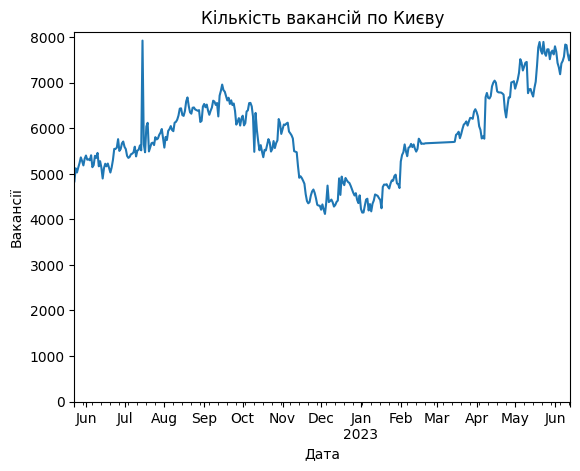

In [91]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [85]:
df["Вакансії"]=df['Вакансії'].replace(0, np.nan)
df['Вакансії']=df["Вакансії"].interpolate()

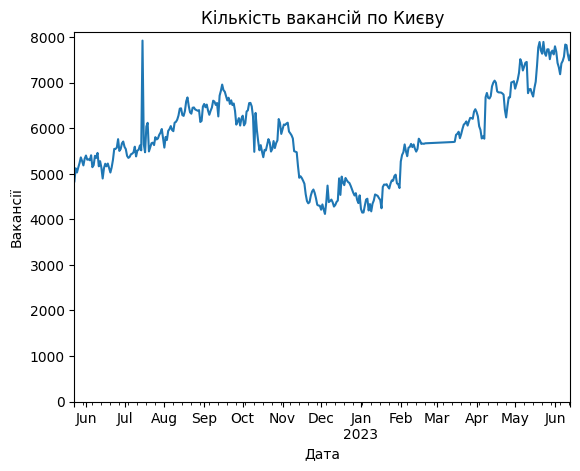

In [92]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [87]:
df['rolling_mean']=df['Вакансії'].rolling(window=7).mean()

In [88]:
df

,Вакансії,rolling_mean
Дата,,
2022-05-23,4831.0,NaN
2022-05-24,5118.0,NaN
2022-05-25,5025.0,NaN
2022-05-26,5134.0,NaN
2022-05-27,5233.0,NaN
...,...,...
2023-06-09,7833.0,7462.285714
2023-06-10,7818.0,7517.857143
2023-06-11,7618.0,7558.571429


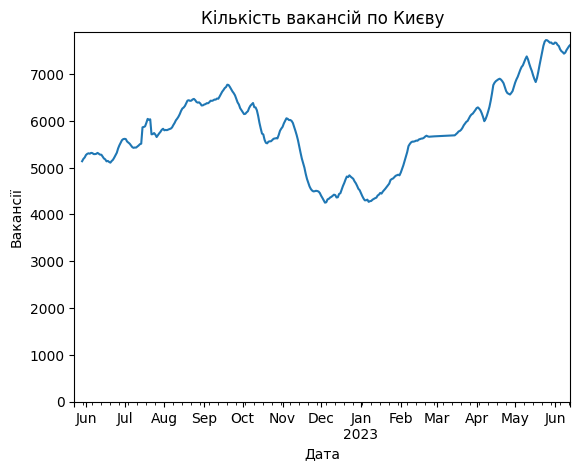

In [93]:
df["rolling_mean"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [90]:
df.describe()

,Вакансії,rolling_mean
count,387.000000,381.000000
mean,5816.724806,5808.536745
std,912.306537,880.827433
min,4116.000000,4253.428571
25%,5227.500000,5270.714286
50%,5693.681818,5729.714286
75%,6420.000000,6391.857143
max,7920.000000,7730.714286
